### LSTM for Time Series Forecasting

Libs required:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,4)

import numpy as np
import pandas as pd
import plotly
import plotly.graph_objs as go

from keras.preprocessing import sequence
from keras.layers import Dense, LSTM
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.metrics import mean_squared_error, mean_absolute_error
from plotly.offline import init_notebook_mode, iplot

Using TensorFlow backend.


In [2]:
init_notebook_mode(connected=True)

#### Reading the data numerically:

In [3]:
#features_train_dt_quixeramobim = pd.read_csv('./data/features_train.csv')
#et0_train_dt_quixeramobim = pd.read_csv('./data/label_train.csv')
#features_val_dt_quixeramobim = pd.read_csv('./data/features_val.csv')
#et0_val_dt_quixeramobim = pd.read_csv('./data/label_val.csv')

# features_train_ = features_train + features_val
#features_train__dt_quixeramobim = pd.read_csv('./data/features_train_.csv')
# et0_train_   = et0_train + et0_val
et0_train__dt_quixeramobim = pd.read_csv('./data/label_train_.csv')

#features_test_dt_quixeramobim = pd.read_csv('./data/features_test.csv')
et0_test_dt_quixeramobim = pd.read_csv('./data/label_test.csv')

In [4]:
et0_train__dt_quixeramobim

ETo
0    6.954343
1    9.081504
2    9.028170
3    7.934186
4    7.704231
..        ...
917  4.267232
918  2.235551
919  4.727333
920  5.530420
921  2.661931

[922 rows x 1 columns]

In [6]:
BATCH_SIZE = 32
N_INPUT = len(et0_train__dt_quixeramobim)
N_FEATURES = len(et0_train__dt_quixeramobim.columns)

In [9]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [13]:
X, y = split_sequence(et0_test_dt_quixeramobim['ETo'].values, 5)

In [14]:
n_features = 1
n_steps = 5

In [15]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

model = Sequential()
model.add((LSTM(50,
                dropout=0.2,
                recurrent_dropout=0.2,
                activation='relu',
                input_shape=(n_steps, n_features))))
model.add(Dense(1))

model.compile(optimizer='adam', 
              loss='mean_absolute_error', 
              metrics=[mean_absolute_error, mean_squared_error])

# Stacking more layers
# model.add(Bidirectional(LSTM(32, 
#                              dropout=0.2, 
#                              recurrent_dropout=0.2, 
#                              return_sequences=True))) activation='relu'

#else:
#    model.add(Bidirectional(LSTM(32, activation='relu', input_shape=(N_INPUT, N_FEATURES))))
# input_shape=(None, float_data.shape[-1]

In [16]:
model.fit(X, y, epochs=40, verbose=1)

Epoch 1/40
226/226 [==============================] - 1s 5ms/step - loss: 6.3196 - mean_absolute_error: 6.3196 - mean_squared_error: 45.2781
Epoch 2/40
226/226 [==============================] - 0s 521us/step - loss: 5.4546 - mean_absolute_error: 5.4546 - mean_squared_error: 34.8407
Epoch 3/40
226/226 [==============================] - 0s 518us/step - loss: 4.2798 - mean_absolute_error: 4.2798 - mean_squared_error: 23.6954
Epoch 4/40
226/226 [==============================] - 0s 553us/step - loss: 3.0336 - mean_absolute_error: 3.0336 - mean_squared_error: 15.6672
Epoch 5/40
226/226 [==============================] - 0s 506us/step - loss: 3.0390 - mean_absolute_error: 3.0390 - mean_squared_error: 16.5324
Epoch 6/40
226/226 [==============================] - 0s 410us/step - loss: 2.7529 - mean_absolute_error: 2.7529 - mean_squared_error: 14.6630
Epoch 7/40
226/226 [==============================] - 0s 317us/step - loss: 2.7964 - mean_absolute_error: 2.7964 - mean_squared_error: 14.8543
E

In [14]:
X_val, y_val = split_sequence(data_val['et0'].values, 5)

In [15]:
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))

In [16]:
y_pred = model.predict(X_val, verbose=1)

49/49 [==============================] - 0s 1ms/step


In [17]:
y_pred = np.array([val for sublist in y_pred for val in sublist])

In [18]:
mae = mean_absolute_error(y_val, y_pred)
mae

<tf.Tensor: id=4287, shape=(), dtype=float32, numpy=0.01611248>

In [19]:
mse = mean_squared_error(y_val, y_pred)

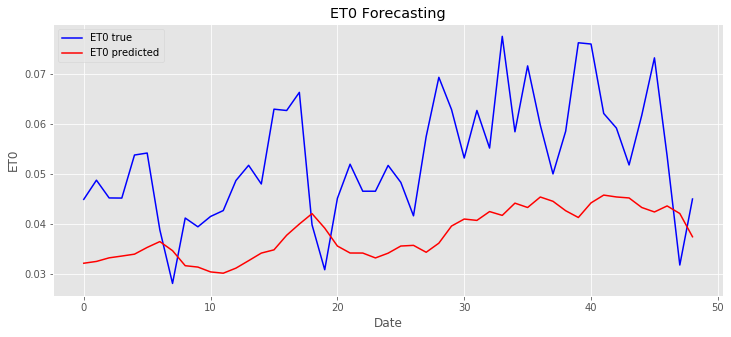

In [21]:
plt.figure(figsize=(12,5))  
plt.plot(y_val, color='blue', label='ET0 true')  
plt.plot(y_pred, color='red', label='ET0 predicted')  
plt.title('ET0 Forecasting')  
plt.xlabel('Date')  
plt.ylabel('ET0')  
plt.legend()
#plt.savefig("eto.png")
plt.show()

There are many other things you could try, in order to improve performance on the temperature-forecasting problem:
- Adjust the number of units in each recurrent layer in the stacked setup. The current choices are largely arbitrary and thus probably suboptimal.
- Adjust the learning rate used by the RMSprop optimizer. Change the optimizer to Adam.
- Try using LSTM layers instead of GRU layers (vice-versa).
- Try using a bigger densely connected regressor on top of the recurrent layers: that is, a bigger Dense layer or even a stack of Dense layers.
- Don’t forget to eventually run the best-performing models (in terms of validation MAE ) on the test set! Otherwise, you’ll develop architectures that are overfitting to the validation set.

In [22]:
model.save('./saved_models/lstm_50units_40epochs.h5')

In [23]:
model.evaluate_generator(test_gen, steps=test_steps)

NameError: name 'test_gen' is not defined

In [123]:
np.sqrt(4.1739006723676413)

2.0430126461594997

* MAE  = 1.6325380717005049

* RMSE = 2.0430126461594997